In [1]:
import h5py 
import numpy as np
import pandas as pd
from SiFoN import chrom_viz as cviz

### Case study for the `chrom_viz` module

First, we load in Sei data. This should include the output `row_labels.txt` file and the `diffs.h5` files. To get Sei results, either follow the directions on the GitHub (https://github.com/FunctionLab/sei-framework) or on HumanBase (https://hb.flatironinstitute.org/deepsea/).

In [6]:
row_labels = pd.read_csv("test_input_data/chr10_89580225_89633389_row_labels.txt", header=0, sep="\t")
row_labels.head(1)

chrom       pos name ref alt strand  ref_match  contains_unk
0  chr10  89580225    .   G   A      +       True         False

For any particular genomic loci (e.g. chr10:89623103), Sei outputs three scores corresponding to each potential alteration at that position (in this case: G>A, G>C, G>T). For this module, we want to focus on the alteration that has the highest predicted impact on regulatory function. The `preprocess_diff` function selects the alteration that has the highest average absolute score across all positions in the dataset. The `diff` array is then reduced to include only the highest SNP per position. The `row_labels` dataframe is adjusted accordingly. 

In [7]:
diff_h5 = h5py.File("test_input_data/chr10_89580225_89633389_diffs.h5", 'r')
diff = np.array(diff_h5.get("data"))
diff_h5.close()
diff, row_labels = cviz.preprocess_diff(diff, row_labels)
print(diff.shape)

(53164, 21907)


Select a SNP of interest to study in further detail.

In [8]:
loc_index, loc, figname = 104, 89623103, "test_output_plots/chrom_viz_heatmap.pdf"

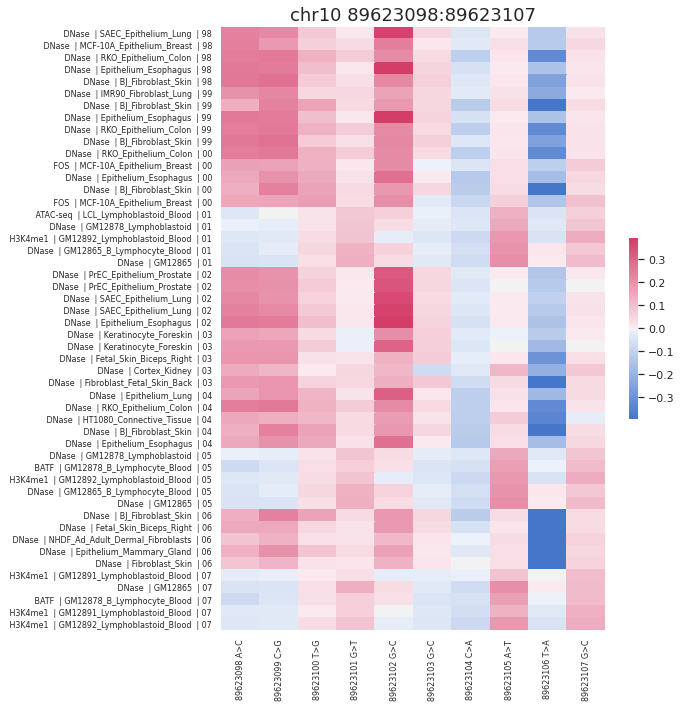

In [20]:
cviz.chromatin_profile_heatmap(diff, row_labels, loc, loc_index, figname, top_X=5, pos_window=5, fontsize=8)

In [10]:
cviz.rank_scatter_plot(diff, row_labels, loc, loc_index, 
                       "test_output_plots/chrom_viz_rank_scatter.html", fontsize=18)